In [2]:
import datacube
import xarray
from datetime import datetime
#from datacube.api.core import get_crs
from datacube.ndexpr import NDexpr
from datacube.api import API
from datacube.execution import execution_engine

In [3]:
%matplotlib inline

In [4]:
# Instantiating API and NDexpr
g = API()
nd = NDexpr()

In [24]:
# construct data request params for band3 and band4
data_req_descriptor = {
    'platform': 'LANDSAT_8',
    'product': 'LEDAPS',
    'variables': ('red', 'nir'),
    'dimensions':{
        'x': {
            'range':(213539.9, 218463.5)
        },
        'y':{
            'range':(3433466.7, 3438883.6)
        },
        'time':{
            'range':(datetime(1995, 1, 1), datetime(1995, 12, 31))
        }
    }
 }

In [25]:
#retrieve data from api
d1 = g.get_data(data_req_descriptor)

In [26]:
d1

{}

In [15]:
dc = datacube.Datacube(config='~/.datacube.conf')

In [16]:
agdc_api = datacube.api._api.API()

In [17]:
dc.index

Index<db=PostgresDb<engine=Engine(postgresql://rishabh@:5432/datacube)>>

In [18]:
datacube.index._api.Index.list_users(dc.index)

<generator object list_users at 0x9ca9e9b4>

In [19]:
#datacube.api.API.get_descriptor(agdc_api)

In [20]:
exe = execution_engine.ExecutionEngine()
exe

In [21]:
exe.add_function('max', max)

In [22]:
dc.list_measurements()

aliases  dtype      name  nodata  \
product           measurement                                             
ls8_ledaps_scene  sr_band2      [band_2, blue]  int16  sr_band2       0   
                  sr_band3     [band_3, green]  int16  sr_band3   -9999   
                  sr_band4       [band_4, red]  int16  sr_band4   -9999   
                  sr_band5       [band_5, nir]  int16  sr_band5   -9999   
                  sr_band6     [band_6, swir1]  int16  sr_band6   -9999   
ls8_ledaps_albers blue          [band_2, blue]  int16      blue   -9999   
                  green        [band_3, green]  int16     green   -9999   
                  red            [band_4, red]  int16       red   -9999   
                  nir            [band_5, nir]  int16       nir   -9999   
                  swir1        [band_6, swir1]  int16     swir1   -9999   

                                                             spectral_definition  \
product           measurement                                                      
ls8_ledaps_scene  sr_band2     {u'wavelength': [436, 437, 438, 439, 440, 441,...   
                  sr_band3     {u'wavelength': [512, 513, 514, 515, 516, 517,...   
                  sr_band4     {u'wavelength': [625, 626, 627, 628, 629, 630,...   
                  sr_band5     {u'wavelength': [829, 830, 831, 832, 833, 834,...   
                  sr_band6     {u'wavelength': [1515, 1516, 1517, 1518, 1519,...   
ls8_ledaps_albers blue         {u'wavelength': [436, 437, 438, 439, 440, 441,...   
                  green        {u'wavelength': [512, 513, 514, 515, 516, 517,...   
                  red          {u'wavelength': [625, 626, 627, 628, 629, 630,...   
                  nir          {u'wavelength': [829, 830, 831, 832, 833, 834,...   
                  swir1        {u'wavelength': [1515, 1516, 1517, 1518, 1519,...   

                              units  
product           measurement        
ls8_ledaps_scene  sr_band2        1  
                  sr_band3        1  
                  sr_band4        1  
                  sr_band5        1  
                  sr_band6        1  
ls8_ledaps_albers blue            1  
                  green           1  
                  red             1  
                  nir             1  
                  swir1           1

In [23]:
dc.list_products()

,name,description,platform,product_type,instrument,format,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,
1,ls8_ledaps_scene,Landsat 8 LEDAPS 25 metre,LANDSAT_8,LEDAPS,OLI_TIRS,GeoTiff,NaN,NaN,NaN,NaN
2,ls8_ledaps_albers,"Landsat 8 LEDAPS 25 metre, 100km tile, Indian ...",LANDSAT_8,LEDAPS,OLI_TIRS,NetCDF,EPSG:32644,"[-25, 25]","[100000.0, 100000.0]","(y, x)"


In [8]:
 var = dc.load(product = 'ls8_ledaps_albers',
              x = (213539.9, 218463.5),
              y = (3433466.7, 3438883.6),
                )
var2 = dc.load(output_crs = 'EPSG:32644', product = 'ls8_ledaps_albers', x = (213539.9, 218463.5), y = (3433466.7, 3438883.6))
var3 = dc.load(output_crs = 'EPSG:4326', product = 'ls8_ledaps_albers', x = (213539.9, 218463.5), y = (3433466.7, 3438883.6))

/usr/lib/python2.7/contextlib.py:17: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  return self.gen.next()


In [9]:
var

<xarray.Dataset>
Dimensions:  (time: 1, x: 198, y: 218)
Coordinates:
  * time     (time) datetime64[ns] 2015-02-12T05:17:41
  * y        (y) float64 3.439e+06 3.439e+06 3.439e+06 3.439e+06 3.439e+06 ...
  * x        (x) float64 2.135e+05 2.136e+05 2.136e+05 2.136e+05 2.136e+05 ...
Data variables:
    blue     (time, y, x) int16 7862 7627 7458 7458 7422 7495 7594 7576 7544 ...
    green    (time, y, x) int16 7306 6857 6508 6508 6403 6607 6856 6788 6674 ...
    red      (time, y, x) int16 6889 6411 5953 5953 5888 6018 6218 6186 6100 ...
    nir      (time, y, x) int16 11511 9161 7032 7032 6068 7930 9804 9516 ...
    swir1    (time, y, x) int16 9060 7378 5853 5853 5389 6038 6860 6727 6448 ...
Attributes:
    crs: EPSG:32644

In [10]:
dc.grid_spec_for_product('ls8_ledaps_albers')

GridSpec(crs=EPSG:32644, tile_size=[100000.0, 100000.0], resolution=[-25, 25])

In [11]:
var.crs

EPSG:32644

In [12]:
var2.crs

EPSG:32644

In [13]:
var3.crs

EPSG:4326

In [14]:
var.items

<bound method Dataset.items of <xarray.Dataset>
Dimensions:  (time: 1, x: 198, y: 218)
Coordinates:
  * time     (time) datetime64[ns] 2015-02-12T05:17:41
  * y        (y) float64 3.439e+06 3.439e+06 3.439e+06 3.439e+06 3.439e+06 ...
  * x        (x) float64 2.135e+05 2.136e+05 2.136e+05 2.136e+05 2.136e+05 ...
Data variables:
    blue     (time, y, x) int16 7862 7627 7458 7458 7422 7495 7594 7576 7544 ...
    green    (time, y, x) int16 7306 6857 6508 6508 6403 6607 6856 6788 6674 ...
    red      (time, y, x) int16 6889 6411 5953 5953 5888 6018 6218 6186 6100 ...
    nir      (time, y, x) int16 11511 9161 7032 7032 6068 7930 9804 9516 ...
    swir1    (time, y, x) int16 9060 7378 5853 5853 5389 6038 6860 6727 6448 ...
Attributes:
    crs: EPSG:32644>

In [15]:
var2.items

<bound method Dataset.items of <xarray.Dataset>
Dimensions:  (time: 1, x: 198, y: 218)
Coordinates:
  * time     (time) datetime64[ns] 2015-02-12T05:17:41
  * y        (y) float64 3.439e+06 3.439e+06 3.439e+06 3.439e+06 3.439e+06 ...
  * x        (x) float64 2.135e+05 2.136e+05 2.136e+05 2.136e+05 2.136e+05 ...
Data variables:
    blue     (time, y, x) int16 7862 7627 7458 7458 7422 7495 7594 7576 7544 ...
    green    (time, y, x) int16 7306 6857 6508 6508 6403 6607 6856 6788 6674 ...
    red      (time, y, x) int16 6889 6411 5953 5953 5888 6018 6218 6186 6100 ...
    nir      (time, y, x) int16 11511 9161 7032 7032 6068 7930 9804 9516 ...
    swir1    (time, y, x) int16 9060 7378 5853 5853 5389 6038 6860 6727 6448 ...
Attributes:
    crs: EPSG:32644>

In [16]:
var3.items

<bound method Dataset.items of <xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 1, x: 1, y: 1)
Coordinates:
  * time       (time) datetime64[ns] 2015-02-12T05:17:41
  * latitude   (latitude) float64 37.5
  * longitude  (longitude) float64 87.5
  * x          (x) int64 0
  * y          (y) int64 0
Data variables:
    blue       (time, y, x) int16 -9999
    green      (time, y, x) int16 -9999
    red        (time, y, x) int16 -9999
    nir        (time, y, x) int16 -9999
    swir1      (time, y, x) int16 -9999
Attributes:
    crs: EPSG:4326>

In [17]:
green  = var.green

In [18]:
green

<xarray.DataArray 'green' (time: 1, y: 218, x: 198)>
array([[[7306, 6857, 6508, ..., 8205, 7870, 7873],
        [6514, 6428, 6444, ..., 8365, 8189, 7915],
        [6455, 6482, 6452, ..., 8099, 8152, 8060],
        ..., 
        [7570, 6631, 6553, ..., 7022, 6968, 6895],
        [7570, 6631, 6553, ..., 7022, 6968, 6895],
        [7494, 6675, 6582, ..., 7027, 6905, 6943]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2015-02-12T05:17:41
  * y        (y) float64 3.439e+06 3.439e+06 3.439e+06 3.439e+06 3.439e+06 ...
  * x        (x) float64 2.135e+05 2.136e+05 2.136e+05 2.136e+05 2.136e+05 ...
Attributes:
    units: 1
    spectral_definition: {u'wavelength': [512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575,

In [19]:
var3.green

<xarray.DataArray 'green' (time: 1, y: 1, x: 1)>
array([[[-9999]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2015-02-12T05:17:41
  * x        (x) int64 0
  * y        (y) int64 0
Attributes:
    units: 1
    spectral_definition: {u'wavelength': [512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, ...
    nodata: -9999

In [20]:
a = green.loc['2015']
a.shape

(1, 218, 198)

In [21]:
a

<xarray.DataArray 'green' (time: 1, y: 218, x: 198)>
array([[[7306, 6857, 6508, ..., 8205, 7870, 7873],
        [6514, 6428, 6444, ..., 8365, 8189, 7915],
        [6455, 6482, 6452, ..., 8099, 8152, 8060],
        ..., 
        [7570, 6631, 6553, ..., 7022, 6968, 6895],
        [7570, 6631, 6553, ..., 7022, 6968, 6895],
        [7494, 6675, 6582, ..., 7027, 6905, 6943]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2015-02-12T05:17:41
  * y        (y) float64 3.439e+06 3.439e+06 3.439e+06 3.439e+06 3.439e+06 ...
  * x        (x) float64 2.135e+05 2.136e+05 2.136e+05 2.136e+05 2.136e+05 ...
Attributes:
    units: 1
    spectral_definition: {u'wavelength': [512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575,

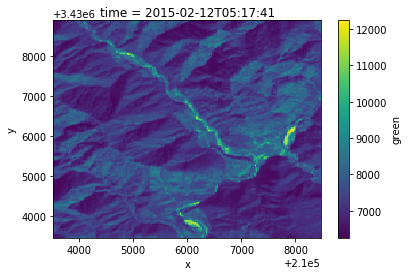

In [22]:
a.plot()


(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([-9999.5, -9999.4, -9999.3, -9999.2, -9999.1, -9999. , -9998.9,
        -9998.8, -9998.7, -9998.6, -9998.5]),
 <a list of 10 Patch objects>)

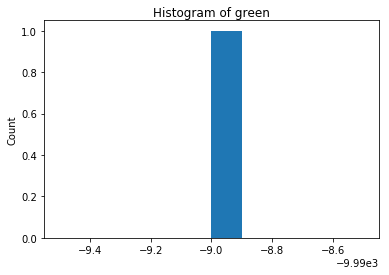

In [23]:
var3.green.loc['2015'].plot()